**Trabalho Final - Análise de Dados - Base Própria**

Disciplina - Ferramentas de Softwarepara uso em Ciência de Dados II

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['StudentsPerformance.csv']


In [2]:
# Carregando os dados
df = pd.read_csv('../input/StudentsPerformance.csv')

In [3]:
# Verificando os dados
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Verificando o nome das colunas
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
# Características do conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# Verificando valores nulos no conjunto de dados
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
# Verificando recursos descritos no conjunto de dados
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


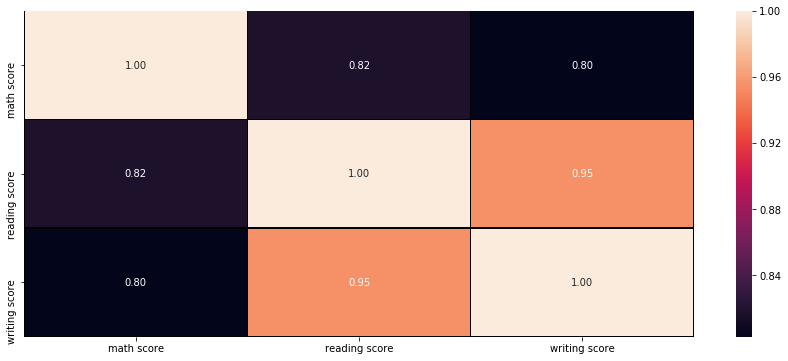

In [8]:
f,ax = plt.subplots(figsize=(15,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', ax=ax, linecolor='black', lw=.7)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


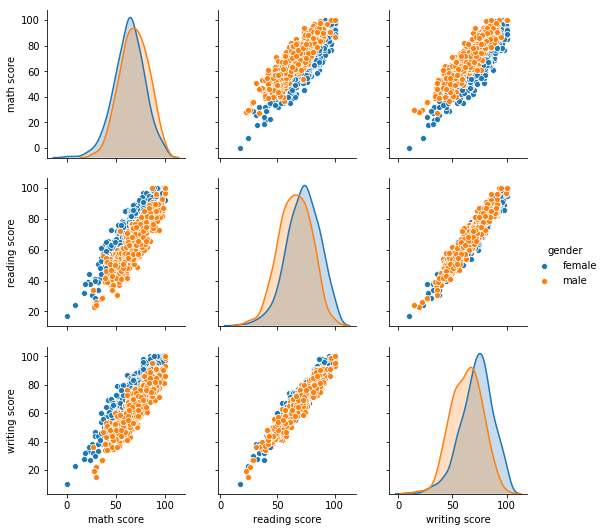

In [21]:
sns.pairplot(df, hue = 'gender')
plt.show()

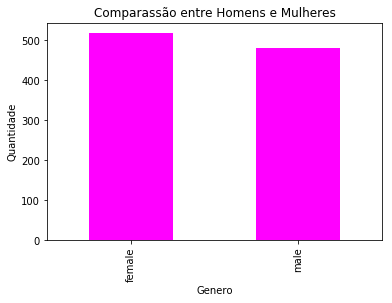

In [10]:
# Visualizando o número de homens e mulheres no conjunto de dados

df['gender'].value_counts(normalize = True)
df['gender'].value_counts(dropna = False).plot.bar(color = 'magenta')
plt.title('Comparassão entre Homens e Mulheres')
plt.xlabel('Genero')
plt.ylabel('Quantidade')
plt.show()

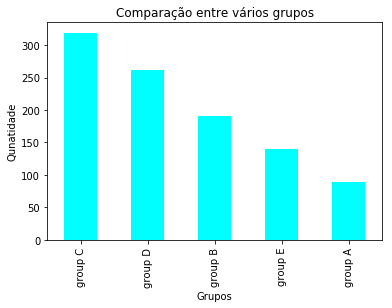

In [11]:
# Visualizando os diferentes grupos no conjunto de dados

df['race/ethnicity'].value_counts(normalize = True)
df['race/ethnicity'].value_counts(dropna = False).plot.bar(color = 'cyan')
plt.title('Comparação entre vários grupos')
plt.xlabel('Grupos')
plt.ylabel('Qunatidade')
plt.show()

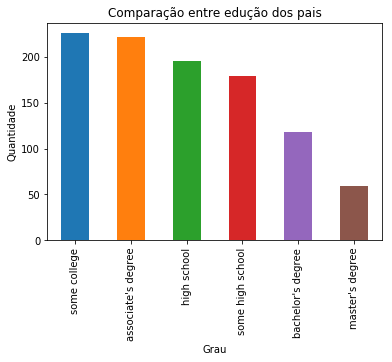

In [12]:
# Visualizando os diferentes níveis de educação dos pais

df['parental level of education'].value_counts(normalize = True)
df['parental level of education'].value_counts(dropna = False).plot.bar()
plt.title('Comparação entre edução dos pais')
plt.xlabel('Grau')
plt.ylabel('Quantidade')
plt.show()

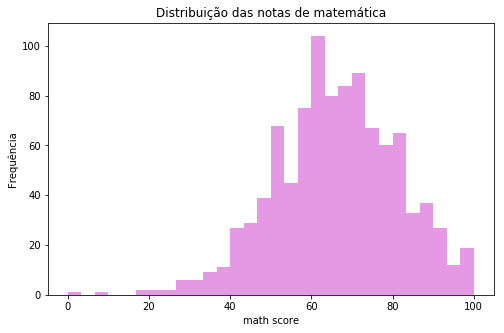

In [23]:
# Distribuição das Notas de matemática
plt.figure(figsize=(8,5))
sns.distplot(df['math score'], kde = False, color='m', bins = 30)
plt.ylabel('Frequência')
plt.title('Distribuição das notas de matemática')
plt.show()

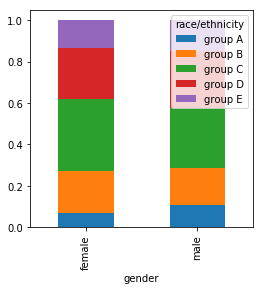

In [13]:
# Comparação entre Genêro vs Raça 

x = pd.crosstab(df['gender'], df['race/ethnicity'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 4))

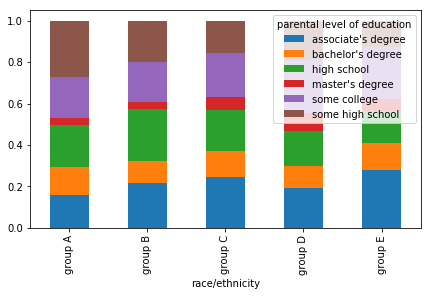

In [14]:
# Comparação de raça / etnia e nível de educação dos pais

x = pd.crosstab(df['race/ethnicity'], df['parental level of education'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = 'True', figsize = (7, 4) )

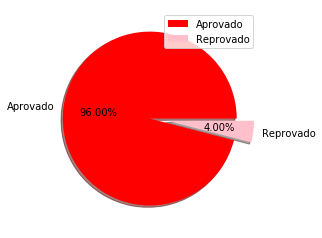

In [16]:
# Gráfico de pizza para representar a proporção de status de aprovação e reprovação entre os alunos

size = [960, 40]
colors = ['red', 'pink']
labels = "Aprovado", "Reprovado"
explode = [0, 0.2]

plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.legend()
plt.show()

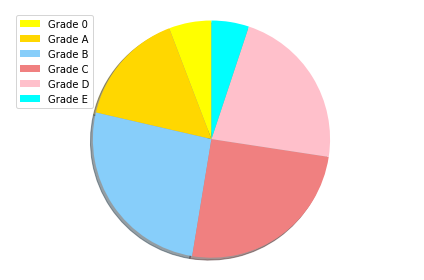

In [19]:
# Traçar um gráfico de pizza para a distribuição de várias notas entre os alunos

labels = ['Grade 0', 'Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E']
sizes = [58, 156, 260, 252, 223, 51]
colors = ['yellow', 'gold', 'lightskyblue', 'lightcoral', 'pink', 'cyan']
explode = (0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels)
plt.axis('equal')
plt.tight_layout()
plt.show()


In [25]:
# Número de alunos com pontuação máxima em todas as três categorias
perfect_writing = df['writing score'] == 100
perfect_reading = df['reading score'] == 100
perfect_math = df['math score'] == 100

perfect_score = df[(perfect_math) & (perfect_reading) & (perfect_writing)]
perfect_score

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
458,female,group E,bachelor's degree,standard,none,100,100,100
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


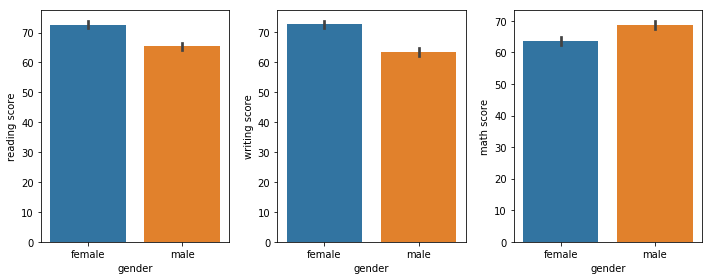

In [27]:
# Bar Plot de Notas de acordo com o gênero
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
sns.barplot(x = 'gender', y = 'reading score', data = df)

plt.subplot(1,3,2)
sns.barplot(x = 'gender', y = 'writing score', data = df)

plt.subplot(1,3,3)
sns.barplot(x = 'gender', y = 'math score', data = df)

plt.tight_layout()